In [1]:
from kmodes.kprototypes import KPrototypes

In [2]:
import numpy as np 
import pandas as pd


# In[2]:


from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("segmentation-data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
df_temp = df[['ID','Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])


In [9]:
df


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,0.844828,2,0.324781,1,2
1,100000002,1,1,0.068966,1,0.420210,1,2
2,100000003,0,0,0.534483,1,0.195144,0,0
3,100000004,0,0,0.465517,1,0.496223,1,1
4,100000005,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,0.500000,1,0.320595,0,0
1996,100001997,1,1,0.155172,1,0.299460,1,0
1997,100001998,0,0,0.224138,0,0.184871,0,0
1998,100001999,1,1,0.103448,1,0.227162,0,0


In [10]:
df = df.drop(['ID'], axis=1)


# In[8]:


# Convert Age and Income into float..
mark_array= df.values


In [11]:
mark_array

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 1.        ,
        2.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 1.        ,
        2.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

In [12]:
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [13]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [14]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 691, ncost: 186.9558354072727
Run: 1, iteration: 2/20, moves: 193, ncost: 178.76442775131193
Run: 1, iteration: 3/20, moves: 96, ncost: 178.05925791950187
Run: 1, iteration: 4/20, moves: 56, ncost: 174.43983091522975
Run: 1, iteration: 5/20, moves: 74, ncost: 174.32744407339447
Run: 1, iteration: 6/20, moves: 4, ncost: 174.32452876619715
Run: 1, iteration: 7/20, moves: 0, ncost: 174.32452876619715
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 672, ncost: 175.47361843718426
Run: 2, iteration: 2/20, moves: 250, ncost: 172.49953879913235
Run: 2, iteration: 3/20, moves: 70, ncost: 172.2173686848265
Run: 2, iteration: 4/20, moves: 26, ncost: 172.1651157406061
Run: 2, iteration: 5/20, moves: 12, ncost: 172.15691666458713
Run: 2, iteration: 6/20, moves: 6, ncost: 172.15338993856724
Run: 2, iteration: 7/20, moves: 2, n

In [16]:
print(kproto.cluster_centroids_)

len(kproto.cluster_centroids_)
cluster_col=[]
for c in clusters:
    cluster_col.append(c)

df['cluster']=cluster_col

[[0.41580114 0.3282922  0.         0.         1.         1.
  0.        ]
 [0.58087451 0.24682172 1.         1.         2.         0.
  0.        ]
 [0.59838533 0.45363811 1.         1.         2.         1.
  1.        ]
 [0.32472801 0.48767789 0.         0.         1.         2.
  2.        ]
 [0.31774369 0.19856738 0.         0.         1.         0.
  0.        ]
 [0.76551724 0.47900286 0.         0.         2.         1.
  1.        ]
 [0.17724868 0.33570437 0.         0.         0.         1.
  1.        ]
 [0.16334277 0.17799355 1.         1.         1.         0.
  0.        ]
 [0.18020022 0.32390976 1.         1.         1.         1.
  1.        ]
 [0.16081942 0.28199497 1.         1.         1.         1.
  0.        ]]


In [17]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,0.844828,2,0.324781,1,2,5
1,1,1,0.068966,1,0.420210,1,2,8
2,0,0,0.534483,1,0.195144,0,0,4
3,0,0,0.465517,1,0.496223,1,1,0
4,0,0,0.603448,1,0.413842,1,1,5


0 green


No handles with labels found to put in legend.


1 red
2 gray
3 orange
4 yellow
5 cyan
6 magenta
7 brown
8 purple
9 blue


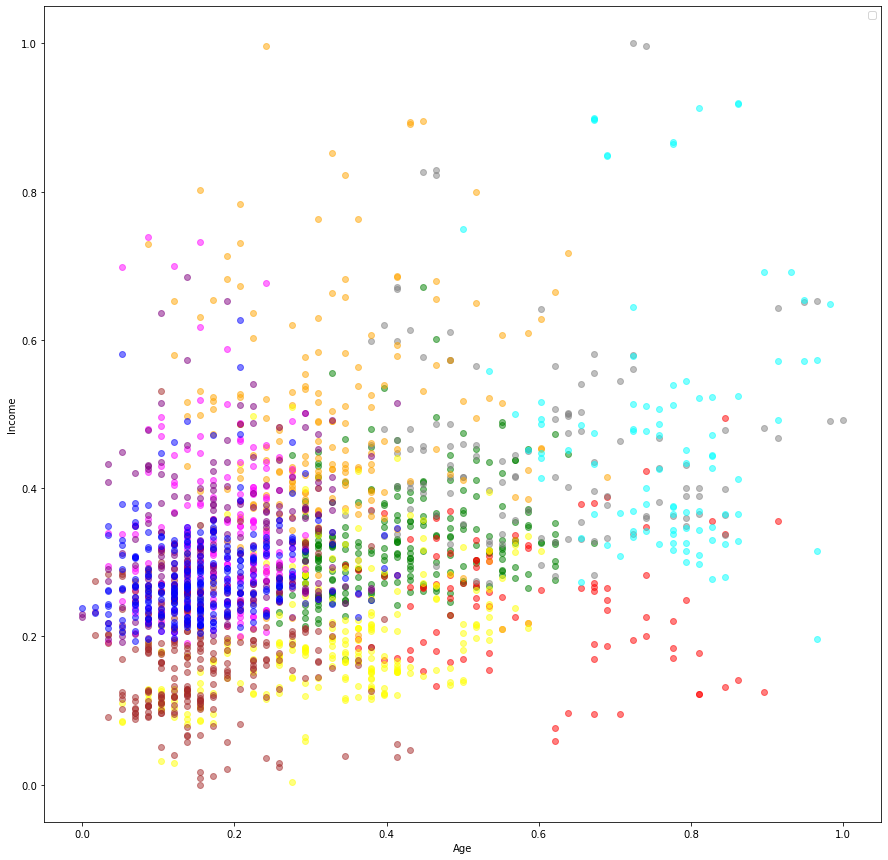

In [18]:
colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    print(i, col)
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age, dftemp['Income'], color=col, alpha=0.5)
    
plt.legend()
plt.show()